In [1]:
import os
os.getcwd()
os.chdir('/Users/rzh/Desktop/Despot')
from utils.geo import *

/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/libpysal/cg/alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/libpysal/cg/alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
/Users/rzh/anaconda3/envs/Despot/lib/pyth

=========3DLandscape Plotting==========
smdFile: h5smds/MERFISH_10_0-0.h5smd
Platform: MERFISH
No Image Path provided.
Cell Types: ['interneurons', 'pyramidal SS', 'pyramidal CA1', 'oligodendrocytes', 'microglia', 'endothelial-mural', 'astrocytes_ependymal']
Mapping cell-type-specific domains...
Arranging cell-type-specific domains...
Plotting domain edges and scatters...
Plotting surfaces...
Saving 3DLandscape to /Users/rzh/Desktop/Despot/landscape.png
=========3DLandscape Finished==========


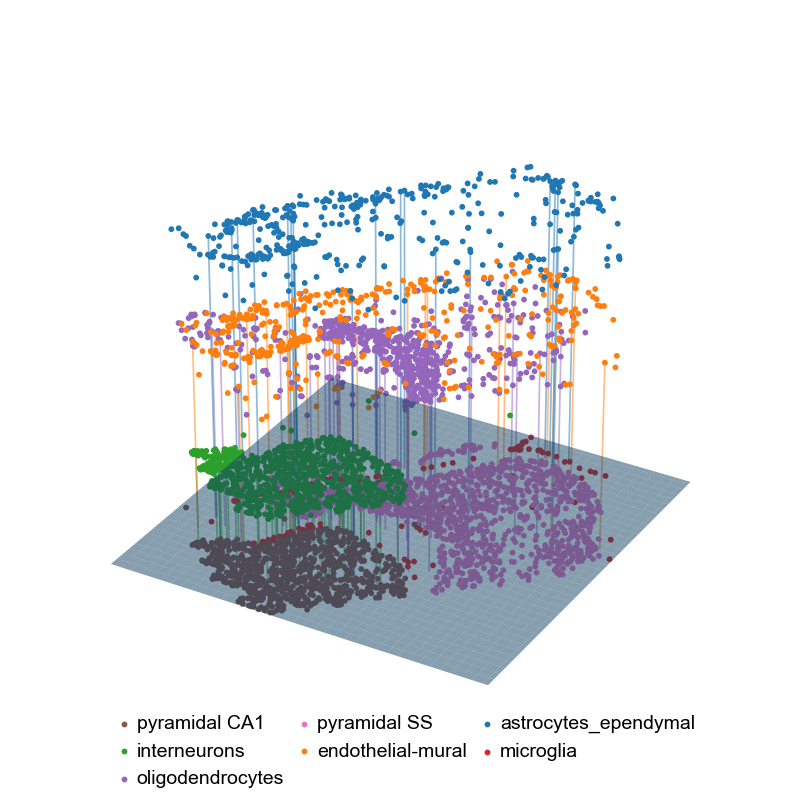

In [25]:
folder = "fig6_MERFISH"
smdFile = "h5smds/MERFISH_10_0-0.h5smd"
res = Show_3D_landscape(smdFile, alpha=50, save=True, plot_edge=False)

=========3DLandscape Plotting==========
smdFile: h5smds/MERFISH_10_1-0.h5smd
Platform: MERFISH
No Image Path provided.
Cell Types: ['interneurons', 'pyramidal CA1', 'oligodendrocytes', 'endothelial-mural', 'astrocytes_ependymal']
Mapping cell-type-specific domains...
Arranging cell-type-specific domains...
Plotting domain edges and scatters...
Plotting surfaces...
=========3DLandscape Finished==========


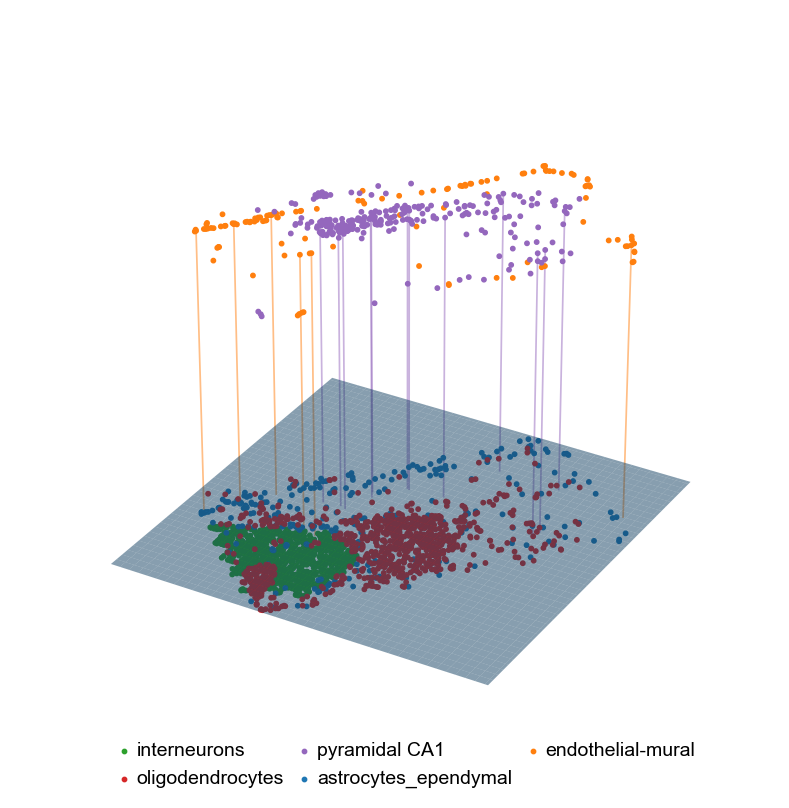

In [26]:
smdFile = "h5smds/MERFISH_10_1-0.h5smd"
res = Show_3D_landscape(smdFile, alpha=50, save=False, plot_edge=False)

=========3DLandscape Plotting==========
smdFile: h5smds/MERFISH_10_2-0.h5smd
Platform: MERFISH
No Image Path provided.
Cell Types: ['interneurons', 'pyramidal SS', 'pyramidal CA1', 'oligodendrocytes', 'microglia', 'endothelial-mural', 'astrocytes_ependymal']
Mapping cell-type-specific domains...
Arranging cell-type-specific domains...
Plotting domain edges and scatters...
Plotting surfaces...
=========3DLandscape Finished==========


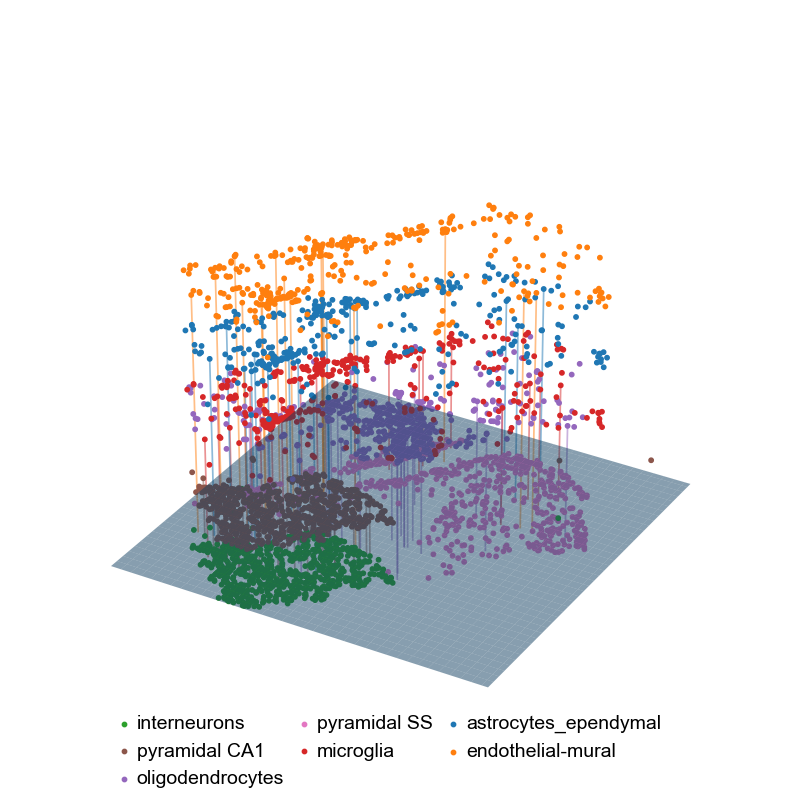

In [27]:
smdFile = "h5smds/MERFISH_10_2-0.h5smd"
res = Show_3D_landscape(smdFile, alpha=50, save=False, plot_edge=False)

/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/libpysal/cg/alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/libpysal/cg/alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
/Users/rzh/anaconda3/envs/Despot/lib/pyth

=========3DLandscape Plotting==========
smdFile: h5smds/Stereo-seq-0.h5smd
Platform: Stereo-seq
No Image Path provided.
Cell Types: ['interneurons', 'pyramidal SS', 'pyramidal CA1', 'oligodendrocytes', 'microglia', 'endothelial-mural', 'astrocytes_ependymal']
Mapping cell-type-specific domains...
Arranging cell-type-specific domains...
Plotting domain edges and scatters...
Plotting surfaces...
=========3DLandscape Finished==========


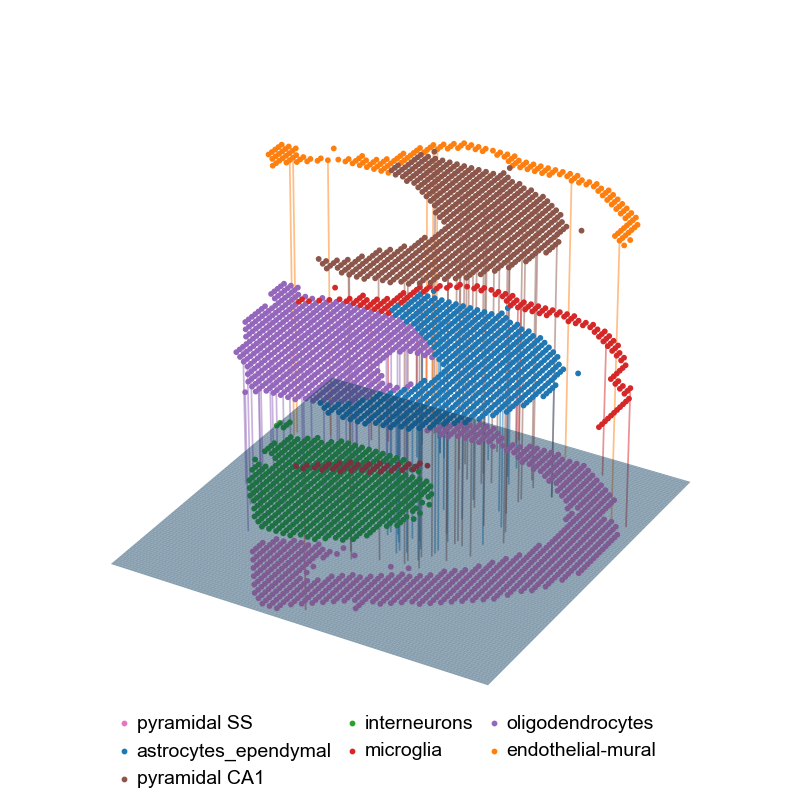

In [1]:
import os
os.getcwd()
os.chdir('/Users/rzh/Desktop/Despot')
from utils.geo import *
smdFile = "h5smds/Stereo-seq-0.h5smd"
res = Show_3D_landscape(smdFile, save=False, plot_edge=False)

In [6]:
from vsl.palette import Set_palette
plt.rcParams["font.sans-serif"] = ["Arial"]
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams['font.size'] = 14

In [ ]:
def Show_Comparison(smdFile,folder, figsize=(3.5,3), compare='platform',cell_type=None, title='F1-score', has_ground_truth=False, save=False):
    from vsl.palette import Set_palette
    plt.rcParams["font.sans-serif"] = ["Arial"]
    plt.rcParams["axes.unicode_minus"] = False
    plt.rcParams['font.size'] = 14
    pip_res = Fscore_Comparison_pip(smdFile, has_ground_truth)
    comp_mtds = ['Giotto', 'Seurat', 'CARD', 'Despot']
    if has_ground_truth:
        comp_mtds= ['Giotto', 'Seurat', 'CARD', 'ground_truth', 'Despot']

    full_ct = list(pip_res.columns)
    full_ct.sort()
    palette, cmap = Set_palette(len(full_ct))
    if cell_type is None:
        comp_ct = list(pip_res.columns)
    else:
        comp_ct = cell_type
    comp_ct.sort()
    comp_res = pip_res.loc[comp_mtds, comp_ct]
    x = np.arange(len(comp_mtds)) * 3
    all_width = 2.5  # the width of the bars
    # fig = None
    # if ax is None:
    fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=True)
    for m in range(len(comp_mtds)):
        comp_mtd = comp_mtds[m]
        measurement = comp_res.loc[comp_mtd, comp_ct]
        measurement = pd.DataFrame([np.nan_to_num(item) for item in measurement], index=comp_res.columns)
        measurement = measurement.sort_index()
        bar_width = all_width / sum(list(measurement.loc[:, 0] > 0))
        multiplier = 0
        for ct in measurement.index:
            if measurement.loc[ct, 0] > 0:
                offset = bar_width * multiplier
                color = palette[full_ct.index(ct)]
                rects = ax.bar(x[m] + offset, measurement.loc[ct, 0], bar_width, color=color)
                ax.bar_label(rects, padding=3, fmt='%.2f', rotation=90, fontsize=10)
                multiplier += 1
    ax.set_title(title, fontsize=16)
    ax.set_xticks(x+all_width/3, comp_mtds)
    ax.set_yticks([.0, .5, 1.0])
    ax.set_yticklabels([.0, .5, 1.0], fontsize=10)
    ax.set_ylim(-0.03, 1.1)
    ax.set_xlim(-0.5, max(x)+all_width)
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)
    if save:
        fig.savefig(folder+'/platform_comparison.svg', dpi=400)
    return fig

In [ ]:
smdFile = "h5smds/PDAC-A-0.h5smd"
smdinfo = smdInfo(smdFile)
map_chains = smdinfo.get_map_chains()
pip_perf = Pipline_findgroups(smdFile, "Seurat", beta=1, greedy=1)

In [6]:
smdFile = "h5smds/PDAC-A-0.h5smd"
pip_res = Fscore_Comparison_pip(smdFile, has_ground_truth=False)

/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Users/rzh/Desktop/Despot/utils/geo.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf = pd.concat([perf, pf], ignore_index=False)
/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_cat

Loading Gene expression finished.
Loading deconvolution data finished.


/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/esda/moran.py:226: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/esda/moran.py:237: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/esda/moran.py:201: RuntimeWarning: invalid value encountered in true_divide
  self.z /= sy
/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

Loading Gene expression finished.
Loading deconvolution data finished.


/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future vers

Loading Gene expression finished.
Loading deconvolution data finished.


/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future vers

In [ ]:
pip_res = []
for i in range(10):
  smdFile = f"h5smds/PDAC-A-{i}.h5smd"
  _res = Fscore_Comparison_pip(smdFile, has_ground_truth=False)
  pip_res.append(_res)
pip_res

In [10]:
pip_res

[cell-type Ductal - CRISP3 high/centroacinar like Cancer clone A  \
 Despot                                  0.913295       0.945313   
 Seurat                                  0.697368       0.872038   
 Giotto                                  0.652482       0.767568   
 CARD                                    0.574713       0.557377   
 
 cell-type Cancer clone B Acinar cells Fibroblasts  \
 Despot          0.953586     0.987013    0.841699   
 Seurat          0.867925          0.7         NaN   
 Giotto               NaN     0.576271     0.52381   
 CARD            0.659459          NaN         NaN   
 
 cell-type Ductal - terminal ductal like Ductal - MHC Class II    mDCs A  \
 Despot                         0.841202              0.855932  0.911111   
 Seurat                         0.744898              0.736318       NaN   
 Giotto                              NaN                   NaN       NaN   
 CARD                                NaN                   NaN       NaN   
 
 cel

In [11]:
agg_mean = pd.DataFrame()
agg_std = pd.DataFrame()
for pip in ['Despot', 'Seurat', 'Giotto', 'CARD']:
  _agg = pd.DataFrame()
  for i in range(10):
    _agg = pd.concat([_agg, pip_res[i].loc[pip, :]], axis=1, ignore_index=True)
  agg_mean[pip] = _agg.mean(axis=1)
  agg_std[pip] = _agg.std(axis=1)
agg_mean

,Despot,Seurat,Giotto,CARD
Ductal - CRISP3 high/centroacinar like,0.917122,0.700393,0.654673,0.562983
Cancer clone A,0.941173,0.875463,0.767242,0.559729
Cancer clone B,0.956739,0.876374,NaN,0.658343
Acinar cells,0.972399,0.687567,0.580594,NaN
Fibroblasts,0.848021,NaN,0.543686,NaN
Ductal - terminal ductal like,0.854336,0.748633,NaN,NaN
Ductal - MHC Class II,0.849264,0.734774,NaN,NaN
mDCs A,0.911111,NaN,NaN,NaN
Tuft cells,0.843636,NaN,NaN,NaN
mDCs B,0.855489,NaN,NaN,NaN


In [17]:
cell_types

Index(['Despot', 'Seurat', 'Giotto', 'CARD'], dtype='object')

Ductal - CRISP3 high/centroacinar like    0.917122
Cancer clone A                            0.941173
Cancer clone B                            0.956739
Acinar cells                              0.972399
Fibroblasts                               0.848021
Name: Despot, dtype: object
Ductal - CRISP3 high/centroacinar like    0.700393
Cancer clone A                            0.875463
Cancer clone B                            0.876374
Acinar cells                              0.687567
Fibroblasts                                    NaN
Name: Seurat, dtype: object
Ductal - CRISP3 high/centroacinar like    0.654673
Cancer clone A                            0.767242
Cancer clone B                                 NaN
Acinar cells                              0.580594
Fibroblasts                               0.543686
Name: Giotto, dtype: object
Ductal - CRISP3 high/centroacinar like    0.562983
Cancer clone A                            0.559729
Cancer clone B                            0.65834

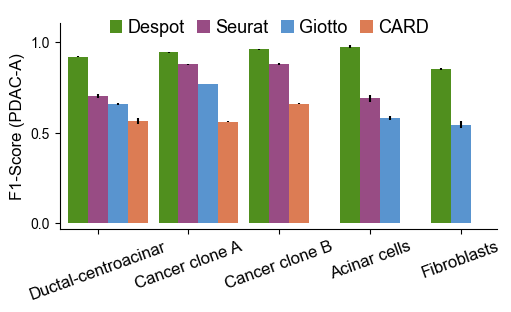

In [21]:
cell_types = agg_mean.index
x = np.arange(len(cell_types[:5]))  # the label locations
width = 0.22  # the width of the bars
multiplier = 0
colors = ['#508f1e', '#984c84', '#5994cf', '#dc7c54']
labels = ['Ductal-centroacinar', 'Cancer clone A', 'Cancer clone B', 'Acinar cells', 'Fibroblasts']
fig, ax = plt.subplots(1, 1, figsize=(5,3), constrained_layout=True)

for attribute,color in zip(list(agg_mean.columns), colors):
    measurement = agg_mean[attribute][:5]
    print(measurement)
    offset = [width * (multiplier - np.sum(pd.isna(agg_mean.loc[s, :attribute]))) for s in cell_types[:5]]
    rects = ax.bar(x + offset, measurement, width, label=attribute, yerr=agg_std[attribute][:5], color=color)
    multiplier += 1
ax.set_ylabel("F1-Score (PDAC-A)", fontsize=12)
ax.set_yticks([.0, .5, 1.0])
ax.set_yticklabels([.0, .5, 1.0], fontsize=10)
ax.set_ylim(-0.03, 1.1)
ax.set_xlim(-0.2, max(x + width)+0.4)
ax.set_xticks(x + width, cell_types[:5])
ax.set_xticklabels(labels, rotation=20, fontsize=12)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.legend(loc='lower left', ncol=4, frameon=False,
            bbox_to_anchor=(0.05, 0.8),
            handletextpad=0.3,
            borderpad=0.5,
            borderaxespad=1.05,
            columnspacing=0.7,
            handlelength=0.7,
            fontsize=13)
plt.show()

In [22]:
ax.figure.savefig("F1.svg")

In [117]:
count = pd.read_csv(txt_file, sep='\t', index_col=0)

In [5]:
smdFile = "h5smds/Stereo-seq.h5smd"
Save_smd_from_txt(smdFile, txt_file, name="SPROD_mat", transport=True)

Save txt finished, matrix data saved in SPROD_mat


In [1]:
import h5py as h5
import numpy as np
from utils.io import *
smdFile

NameError: name 'smdFile' is not defined

In [10]:
def Load_smd_to_AnnData(smdFile: str,
                        h5data: str = "matrix",
                        hires: bool = False,
                        loadDeconv: bool = False,
                        loadImg: bool = True,
                        platform: str = '10X_Visium',
                        dtype='float32') -> ad.AnnData:
    # use h5py to load origin info
    with h5.File(smdFile, 'r') as h5_obj:
        h5mat = h5_obj['matrix']
        h5img = h5_obj["sptimages"]
        coord = h5img["coordinates"]
        sf = h5img["scalefactors"]

        # select the active data, default 'matrix'
        datas = h5data.split('/')
        data0 = datas[0]
        h5dat = h5_obj[data0]

        # create X in AnnData, including data, indices, indptr, shape
        data = h5dat['data']
        indices = h5dat['indices']
        indptr = h5dat['indptr']
        shape = h5dat['shape']
        X = csc_matrix((data, indices, indptr), shape=shape, dtype=dtype).T

        # create obs and obsm
        if platform == "ST":    # rotate anticlockwise 90 degrees for ST
            obs = pd.DataFrame({'in_tissue': np.array(coord["tissue"][:], dtype='int32'),
                                'array_row': np.array(coord["row"][:], dtype='int32'),
                                'array_col': np.array(coord["col"][:], dtype='int32'),
                                'image_row': np.array(-coord["imagecol"][:], dtype='int32'),
                                'image_col': np.array(coord["imagerow"][:], dtype='int32')},
                               index=bytes2str(coord["index"][:]))
        else:
            obs = pd.DataFrame({'in_tissue': np.array(coord["tissue"][:], dtype='int32'),
                                'array_row': np.array(coord["row"][:], dtype='int32'),
                                'array_col': np.array(coord["col"][:], dtype='int32'),
                                'image_row': np.array(coord["imagerow"][:], dtype='int32'),
                                'image_col': np.array(coord["imagecol"][:], dtype='int32')},
                               index=bytes2str(coord["index"][:]))
        obs = obs.sort_index()
        obs_names = bytes2str(h5dat['barcodes'][:])
        obs = obs.loc[obs_names, :]

        # load idents
        idents = h5dat['idents']
        for ident in idents.keys():
            # change idents' datatype if they are numeric
            idf = np.array(idents[ident][:], dtype='str')
            if str.isnumeric(idf[0]):
                idf = np.array(idents[ident][:], dtype=int)
            # change idents to category
            idf = pd.Series(idf, index=bytes2str(h5mat['barcodes'][:]), dtype='category')
            obs[ident] = idf.loc[obs_names]
        obsm = np.array([obs['image_col'], obs['image_row']])
        obsm = obsm.T

        # create var
        if data0 != "matrix":  # which means Decont data exists
            h5fea = bytes2str(h5dat['features']['name'][:])
            h5fea = [fea.upper() for fea in h5fea]
            var = pd.DataFrame({'gene_name': h5fea}, index=h5fea)
        else:
            # var = pd.DataFrame({'gene_ids': np.array(features["id"][:], dtype='str'),
            #                     'feature_types': np.array(features['feature_type'][:], dtype='str'),
            #                     'genome': np.array(features['genome'][:], dtype='str'),
            #                     'gene_name': np.array(features['name'][:], dtype='str')})
            # var.index = var['gene_ids']
            h5fea = bytes2str(h5dat['features']['name'][:])
            h5fea = [fea.upper() for fea in h5fea]
            var = pd.DataFrame({'gene_name': h5fea}, index=h5fea)
        name = str(h5_obj["name"][0], encoding='utf8')

        adata = ad.AnnData(X, obs=obs, var=var)
        adata.obs_names = obs_names
        adata.obsm['spatial'] = obsm
        print("Loading Gene expression finished.")
        # create Images
        if loadImg and 'lowres' in h5img:
            adata.uns['spatial'] = {name: {
                'images': {'lowres': h5img['lowres'][:].T},
                'scalefactors': {'spot_diameter_fullres': sf['spot'][0],
                                 'tissue_hires_scalef': sf['hires'][0],
                                 'fiducial_diameter_fullres': sf['fiducial'][0],
                                 'tissue_lowres_scalef': sf['lowres'][0], },
                'metadata': {}
            }}
            if hires and 'hires' in h5img:
                adata.uns['spatial'][name]['images']['hires'] = h5img['hires'][:].T

            print("Loading spatial images finished.")
        # create svgs
        if 'is_HVG' in h5dat['features']:
            h5svg = h5dat['features']['is_HVG']
            HVGS = {}
            if len(h5svg) > 0:
                for svg in h5svg.keys():
                    HVG = pd.DataFrame()
                    if svg == "BayesSpace" or svg == "leiden":
                        pass
                    else:
                        for elem in h5svg[svg].keys():
                            HVG = pd.concat([HVG, pd.Series(h5svg[svg][elem], name=elem)], axis=1)
                    HVGS[svg] = HVG
            adata.uns["HVGs"] = HVGS

        # whether you need to do subset
        if len(datas) > 1:
            subarcodes = bytes2str(h5_obj[h5data + '/barcodes'][:])
            adata = adata[subarcodes]

        # create deconv results
        if loadDeconv:
            h5dcv = h5_obj[f"{h5data}/deconv"]
            if len(h5dcv.keys()) > 0:
                for dcv in h5dcv.keys():
                    shape = h5dcv[dcv]['shape']
                    weights = np.array(h5dcv[dcv]['weights']).reshape(shape[1], shape[0]).T
                    barcodes = bytes2str(h5dcv[dcv]['barcodes'][:])
                    cell_type = bytes2str(h5dcv[dcv]['cell_type'][:])
                    w = pd.DataFrame(weights, index=barcodes, columns=cell_type)
                    if len(w) != len(obs_names):
                        print(f"Warning::Cell Proportion Length from {h5data}/deconv/{dcv} is not matched with Barcodes.")
                        w = w.reindex(obs_names, fill_value=0)
                    
                    adata.obsm[dcv] = w
            print("Loading deconvolution data finished.")

        if 'abundance' in h5dat.keys():
            h5abd = h5dat['abundance']
            if len(h5abd.keys()) > 0:
                for abd in h5abd.keys():
                    shape = h5abd[abd]['shape']
                    weights = np.array(h5abd[abd]['weights']).reshape(shape[1], shape[0]).T
                    barcodes = bytes2str(h5abd[abd]['barcodes'][:])
                    cell_type = bytes2str(h5abd[abd]['cell_type'][:])
                    w = pd.DataFrame(weights, index=barcodes, columns=cell_type)
                    adata.obsm[abd] = w

    # making var and obs unique
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    return adata

In [6]:
smd = Load_smd_to_AnnData(smdFile, loadDeconv=True)
smd

Loading Gene expression finished.
Loading deconvolution data finished.


AnnData object with n_obs × n_vars = 2343 × 24302
    obs: 'in_tissue', 'array_row', 'array_col', 'image_row', 'image_col', 'BayesSpace', 'Giotto', 'SEDR', 'Seurat', 'SpaGCN', 'leiden'
    var: 'gene_name'
    uns: 'HVGs'
    obsm: 'spatial', 'CARD', 'Cell2Location', 'Giotto', 'SPOTlight', 'SPOTlight_es', 'SPOTlight_vae', 'Seurat', 'StereoScope', 'StereoScope_es', 'StereoScope_na', 'spacexr', 'spacexr_es'

In [ ]:
smdFile = "h5smds/Stereo-seq-0.h5smd"
Best_Dict, Best_Fscore = Despot_Find_bestGroup(smdFile=smdFile)

In [4]:
Best_Dict

{'interneurons': (0.8972477064220183, (1, 1), 'matrix+Giotto+BayesSpace'),
 'pyramidal SS': (0.875195007800312, (3, 4, 6), 'matrix+Seurat+BayesSpace'),
 'pyramidal CA1': (0.966693744922827, (2, 4), 'SPROD_mat+Giotto+BayesSpace'),
 'oligodendrocytes': (0.9395744680851064,
  (3, 1),
  'SPROD_mat+StereoScope_es+BayesSpace'),
 'microglia': (0.7445255474452555, (10,), 'SPROD_mat+CARD+BayesSpace'),
 'endothelial-mural': (0.9325153374233128, (6, 20), 'SPROD_mat+Giotto+Giotto'),
 'astrocytes_ependymal': (0.9285127362366474,
  (2, 4),
  'SPROD_mat+SPOTlight+BayesSpace')}

In [6]:
res = Show_3D_landscape(smdFile, alpha=50, save=False, plot_edge=False)

=========3DLandscape Plotting==========
smdFile: h5smds/Stereo-seq-0.h5smd
Platform: Stereo-seq
Image Path: data/Stereo-seq/empty/tissue_lowres_image.png


FileNotFoundError: [Errno 2] No such file or directory: 'data/Stereo-seq/empty/tissue_lowres_image.png'